# Task-1 : Prediction using Supervised ML


### In this task we predict percentage of student based on number of study hours. It is a simple linear regression task as it involves only two variables(Hours,Scores).


Dataset: "http://bit.ly/w-data"

In [2]:
### importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data=pd.read_csv("http://bit.ly/w-data")

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
print("No of Data Samples",len(data))

No of Data Samples 25


In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Data Visualization
Here we understand the relationship between two variables

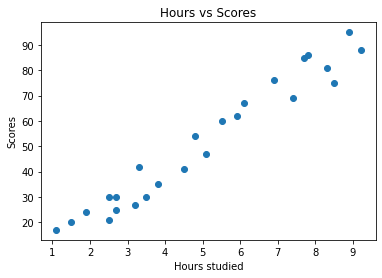

In [8]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Hours studied")
plt.ylabel("Scores")
plt.title("Hours vs Scores")
plt.show()

OBSERVATION: From the above graph we can observe score increases with number of hours.
We can verify this with correlation function

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


So both the variables are positively correlated to each other

### Spliting the data

In [19]:
# train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'],train_size=0.80,test_size=0.20,random_state=0)


In [20]:
x_train.shape,x_test.shape

((20, 1), (5, 1))

It is clear that we have divided 80% of data to training data and 20% of data to test data

### Training the model

In [21]:
# now we use 80% of data(training) to train our linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

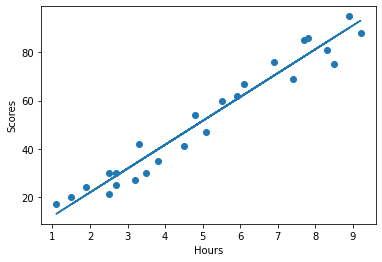

In [26]:
#ploting prediction line
# line equation is y=m*x+c
l=(data['Hours']*lr.coef_)+lr.intercept_
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, l)
plt.xlabel('Hours')
plt.ylabel('Scores');
plt.show()

### Make predictions

Here,we test our model by making predictions with test data

In [42]:
y_pr = lr.predict(x_test).round()
new_scores = pd.DataFrame({'Hours': [i[0] for i in x_test] ,'Predicted values':[y for y in y_pr]})
new_scores

,Hours,Predicted values
0,1.5,17.0
1,3.2,34.0
2,7.4,75.0
3,2.5,27.0
4,5.9,60.0


### comparing original scores with predicted scores

In [43]:
compare=pd.DataFrame({'Actual Scores':y_test,'Predicted Scores %':y_pred})
compare

,Actual Scores,Predicted Scores %
5,20,17.0
2,27,34.0
19,69,75.0
16,30,27.0
11,62,60.0


### Model Evaluation

In [50]:
#Checking the efficiency of model
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pr))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pr))
print("R2 Score: ", metrics.r2_score(y_test, y_pr))

Mean Absolute Error:  4.2
Mean Squared Error:  21.4
R2 Score:  0.9459923278820916


OBSERVATIONS:
Here low value of Mean absolute error indicates that chance of error through this model is very less.
Here R2 score is 0.94 (nearly 1) which indicates that the model fits perfectly to the dataset.

## What will be predicted score if a student studies for 9.25 hrs/ day?

In [68]:
h = np.array([[9.25]])
print("Hours/day : 9.25")
print("predicted Score:",lr.predict(h)[0])

Hours/day : 9.25
predicted Score: 93.69173248737538


So if a student studies for 9.25hrs a day he would score 93.69%